# Sampling

![Workflow](https://s3.amazonaws.com/dq-content/283/s1m1_course_workflow.svg)

## Populations and Samples
1. What's the average salary of the individuals in our company working in IT roles? (Assign either 'population' or 'sample' to the variable question1.)
2. What's the proportion of individuals in the IT department having salaries under $60000? (Assign either 'population' or 'sample' to the variable question2.)
3. What's the minimum salary in the entire company? (Assign either 'population' or 'sample' to the variable question3.)
4. What's the minimum salary in the IT department of our company? (Assign either 'population' or 'sample' to the variable question4.)
5. What's the proportion of salaries under $20000 in the entire company? (Assign either 'population' or 'sample' to the variable question5.)

In [5]:
question1 = 'population'
question2 = 'population'
question3 = 'sample'
question4 = 'population'
question5 = 'sample'

---
## Sampling Error
Explore the dataset.

1. Print the first five rows using DataFrame.head() and the last five rows with DataFrame.tail().
2. Find the number of rows and columns using DataFrame.shape.
3. Learn about each column from the documentation. You can also find useful documentation in this glossary and on WNBA's official page.


Take one measure of the sampling error.

1. Use the Games Played column to find the maximum number of games played by a player in the 2016-2017 season. The dataset contains all the players who played at least one game, so it's a population relative to our question. Find this parameter, and assign the result to a variable named parameter.
2. Using the DataFrame.sample() method, randomly sample 30 players from the population, and assign the result to a variable named sample.
    * When calling Series.sample(), use the argument random_state = 1. This makes your results reproducible, and it helps us with the answer-checking (we'll discuss this on the next screen).
3. Find the maximum number of games using the sample, and assign the result to a variable named statistic.
4. Measure the sampling error, and assign the result to a variable named sampling_error.

In [10]:
import pandas as pd
wnba = pd.read_csv('wnba.csv')
parameter = wnba['Games Played'].max()
sample = wnba['Games Played'].sample(30, random_state = 1)
statistic = sample.max()
sampling_error = parameter - statistic
print(sampling_error)

2


---
## Simple Random Sampling

1. Using simple random sampling, take 100 samples of 10 values each from our WNBA data set, and for each sample, measure the average points scored by a player during the 2016-2017 season. For each of the 100 iterations of a for loop, do the following:
    * Sample 10 values from the PTS column.
    * Compute the mean of this sample made of 10 values from the PTS column, and append the result to a list.
    * To make your results reproducible, vary the random_state parameter of the sample() method with values between 0 and 99. For the first iteration of the for loop, random_state should equal 0, for the second iteration should equal 1, for the third should equal 2, and so on.
2. Display the discrepancy between the parameter of interest (the mean of the PTS column) and the statistics obtained in the previous step.
    * Using plt.scatter(), display all the 100 sample means using a scatter plot. For the x-axis, use integers from 1 to 100 to designate the sample number. Use the y-axis for the sample means.
    * Using plt.axhline(), draw a horizontal line that represents the average number of points for the population.

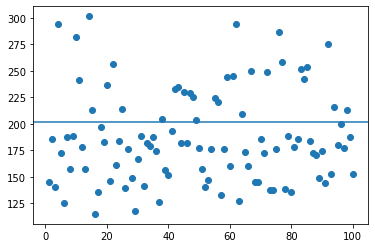

In [11]:
import matplotlib.pyplot as plt

wnba = pd.read_csv('wnba.csv')
sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)

![MaxMin](https://s3.amazonaws.com/dq-content/283/s1m1_var_population.svg)
![UnRep](https://s3.amazonaws.com/dq-content/283/s1m1_unrepresentative.svg)

---
## Stratified Sampling
Perform stratified sampling: stratify the dataset by player position, and then do simple random sampling on every stratum. At the end, use the sample to determine which position scores the highest number of points per game.

1. Create a new column that describes the number of points a player scored per game during the season. The number of total points a player scored during the entire season is in the PTS column, and the number of games played is in the Games Played column. Give the new column a relevant name.
2. Stratify the wnba data set by player position. The Pos column describes a player's position. Assign each stratum to a different variable.
3. Loop through the strata, and for each stratum, do the following:
    * Sample 10 observations using simple random sampling (set random_state = 0).
    * Find the mean points per game using the sample. Use the new column you created earlier.
    * Find a way to store the mean along with its corresponding position. You can use a dictionary.
4. Find the position that scores the highest number of points per game, and assign its name to a variable named position_most_points.
    * To find the dictionary key that has the greatest dictionary value, you can use this technique.

In [14]:
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sampling on each stratum
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key = points_per_position.get)
print(points_per_position)

{'G': 7.092926195632343, 'F': 8.702175158545568, 'C': 9.833761394334251, 'G/F': 6.817264935760487, 'F/C': 9.059118773946361}


---
## Proportional Stratified Sampling

1. Stratify the dataset by the number of games played in the following way: the first stratum should include players who played 12 games or fewer; the second stratum should players who played more than 12 games but up to 22 (included); the third stratum should include players who played more than 22 games (22 not included).
2. Perform stratified sampling 100 times. For each of the 100 iterations of a for loop, do the following:
    * Sample each stratum proportionally. Sample at random: one sample observation from the first stratum, two sample observations from the second, and seven sample observations from the third stratum (eventually, we'll concatenate these sample observations and calculate the mean of the PTS column).
    * random_state should vary from 0 to 99: 0 for the first iteration, 99 for the final iteration.
    * Once you're done with the sampling for the current iteration of the loop, concatenate all the sample observations into one final sample. You can use pd.concat().
    * Compute the mean of the final sample, and append it to a list defined outside the loop. The mean should be for the PTS column.
3. Display the entire sampling process.
    * Using plt.scatter(), display the sampling means on a scatter plot. Place the means on the y-axis and the sample numbers on the x-axis (the numbers should range from 1 to 100 - both endpoints included).
    * Using plt.axhline(), display the population mean for the total points in the form of a horizontal line.

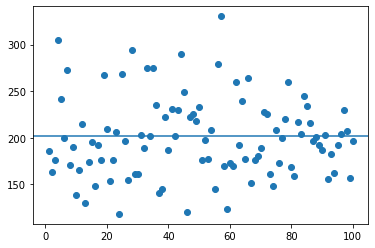

In [15]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

---
## Cluster Sampling


Assuming that all the teams in our dataset have a website from which we can take data, we end up with this list of clusters (each team's website is a cluster) :

In [16]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


Then we need to find a way to randomly pick a few clusters from our listing. There are many ways to do that, but the important thing to keep in mind is that we should avoid picking a cluster twice. Here's one way to sample four clusters randomly:

In [17]:
print(pd.Series(wnba['Team'].unique()).sample(4, random_state = 0))

6     PHO
11    IND
4     MIN
10    ATL
dtype: object


1. Pick four team clusters randomly using the technique we've learned (use random_state = 0).
2. Collect the data from each cluster without sampling the clusters. Create a new DataFrame object that stores the data collected from all clusters.
3. Use the data collected to estimate the mean for the following player attributes:
    * Height
    * Age
    * BMI
    * Total points
4. Finally, measure the sampling error of your estimates, and assign the errors to the following variables: sampling_error_height, sampling_error_age, sampling_error_BMI, sampling_error_points.

In [18]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()